## Mini-project 0:

## NRP simulation

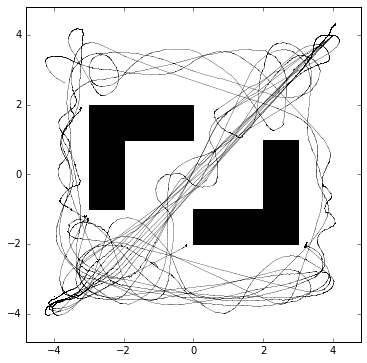

In [1]:
import rospy
import time
from hbp_nrp_virtual_coach.virtual_coach import VirtualCoach

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches
import numpy as np

""" ----- TO DO -----"""
# choose the simulation time
Time = 900 # default: Time = 240
""" ----- TO DO -----"""

# initialize virtual coach, password : password
vc = VirtualCoach(environment='local', storage_username='nrpuser')

# launch the experiment
vc.print_cloned_experiments()
sim = vc.launch_experiment('NRP_miniproject1')
time.sleep(10)

# run the experiment
sim.start()
t_start = rospy.Time.now()
t_stop = t_start + rospy.Duration(Time) 
while rospy.Time.now() < t_stop:
    time.sleep(1)
sim.pause()
sim.stop()

print # Visualizatio of simulation (Exploiration data)
print "########################################################"

# exctract and transform data
states = pd.read_csv('NRP_data_robot_positions.csv', delimiter=',',header=0).values
positions = np.array([pd.to_numeric(states[:,0], errors='coerce'), pd.to_numeric(states[:,1], errors='coerce')]).T


# obstracles
rect1 = patches.Rectangle((-3.0,-1.0), 1., 2., color='black')
rect2 = patches.Rectangle((-3.0, 1.0), 3., 1., color='black')
rect3 = patches.Rectangle(( 0.0,-2.0), 2., 1., color='black')
rect4 = patches.Rectangle(( 2.0,-2.0), 1., 3., color='black')

# # plot positions
fig = plt.figure(0,figsize=(8, 6))

ax = fig.add_subplot(111)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

plt.scatter(states[:,0], states[:,1], s=1e-5)
plt.axis([-4.8, 4.8, -4.8, 4.8])
plt.gca().set_aspect('equal', adjustable='box')
plt.show()